<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/6_5_one_class_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

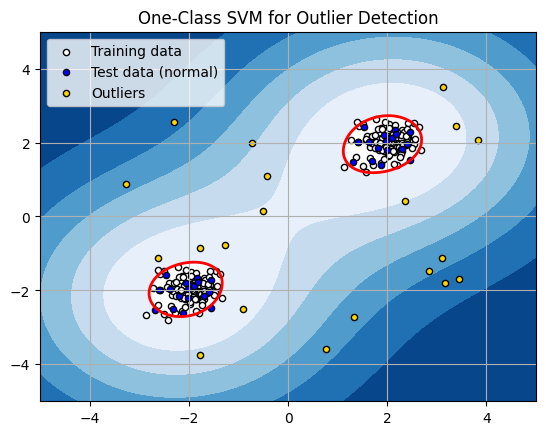

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# 정상 데이터 생성 (2D Gaussian)
X_train = 0.3 * np.random.randn(100, 2) # 생성된 모든 값에 0.3을 곱함으로써, 데이터의 표준편차를 1에서 0.3으로 줄입니다. (즉, 값들이 평균 0을 중심으로 더 좁게 분포됨)
X_train = np.r_[X_train + 2, X_train - 2]

# 테스트 데이터 생성 (정상 + 이상치)
X_test = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X_test + 2, X_test - 2] # np.r_는 두 배열을 위로 쌓는(concatenate) 함수입니다.
"""
X_train은 이제 두 개의 군집(cluster) 으로 구성된 200개의 샘플을 가지게 됩니다.
하나는 원래 데이터보다 오른쪽 위로 이동한 군집 (+2)
다른 하나는 왼쪽 아래로 이동한 군집 (-2)
"""

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2)) # 균등분포(uniform distribution) 를 따르는 무작위 값을 생성합니다. 범위는 -4에서 4 사이입니다.

# 모델 학습
"""
파라미터 설명:
kernel="rbf"
→ RBF 커널 (Radial Basis Function) 을 사용합니다.
→ 데이터를 고차원으로 매핑해서 더 복잡한 경계를 만들 수 있음 (비선형 분포에 효과적).

gamma=0.1
→ RBF 커널의 감도(sensitivity) 를 조절하는 하이퍼파라미터입니다.
→ 값이 작으면 부드러운 경계, 값이 크면 더 세밀하게 데이터를 감싸는 경계를 만듭니다.

nu=0.05
→ 이상치의 비율을 지정합니다.
→ 전체 데이터 중에서 약 5% 정도는 이상치라고 판단하도록 설정하는 역할입니다.
→ 또한 학습 시 허용하는 오차의 비율도 의미합니다.
"""
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

# 예측
"""
np.linspace(-5, 5, 500)
-5에서 5까지의 구간을 500개의 균일한 간격으로 나눈 1차원 배열을 만듭니다.
즉, -5, -4.98, -4.96, ..., 5 이런 숫자들로 구성된 배열입니다.

np.meshgrid(...)
두 개의 1차원 배열을 받아서, 2차원 평면상에 모든 조합의 점 좌표를 생성합니다.
결과적으로 xx, yy는 각각 500×500 형태의 배열이 됩니다:
xx는 각 점의 x좌표
yy는 각 점의 y좌표
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # xx와 같은 모양인 (500, 500)의 2차원 배열로 다시 바꿉니다.


# 시각화
plt.title("One-Class SVM for Outlier Detection")
"""
plt.contourf(...)	채워진 등고선 그림을 그립니다. 등고선 사이를 색으로 채워줌.
xx, yy	각 격자 위치의 x좌표, y좌표입니다 (500×500).
Z	각 (x, y) 위치에 대한 SVM의 결정 함수 값입니다. (정상일수록 값이 큼)
levels=np.linspace(Z.min(), 0, 7)	결정 함수 값의 범위(단계) 를 지정합니다.
Z의 최소값부터 0까지 7단계로 나누어 색칠
cmap=plt.cm.Blues_r	색상 맵입니다. 파란색 계열이며 _r은 색상 반전(reverse) 을 의미합니다.
→ 이상치일수록 진한 파란색
"""

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r) # plt.contourf(...)	채워진 등고선 그림을 그립니다. 등고선 사이를 색으로 채워줌
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')  # decision boundary


# 데이터 플로팅
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolors='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=20, edgecolors='k', label='Test data (normal)')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=20, edgecolors='k', label='Outliers')

plt.legend()
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.grid(True)
plt.show()

In [ ]:
# xx는 일반적으로 2차원 배열입니다. (예: shape = (500, 500))
# .ravel()을 하면 이걸 1차원으로 일렬로 펼쳐줍니다
# 결과: shape = (250000,) 이 되는 1차원 배열

import numpy as np

xx = np.array([[1, 2],
               [3, 4]])

xx.ravel()


array([1, 2, 3, 4])

In [ ]:
# np.c_[...]란?

# np.c_는 NumPy의 단축 문법으로,
# 두 개 이상의 배열을 "열 방향(column-wise)" 으로 연결(concatenate) 해주는 역할을 합니다.

import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

result = np.c_[a, b]
print(result)

[[1 4]
 [2 5]
 [3 6]]
